In [12]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
df_country_US = df[df['job_country'] == 'United States']

In [14]:
df_skills = df_country_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [18]:
# count the number of occurrences from the job skills and job title short group by
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
# type(df_skills_count)
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True) # sort values
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [29]:
# create a list of the top 3 roles
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

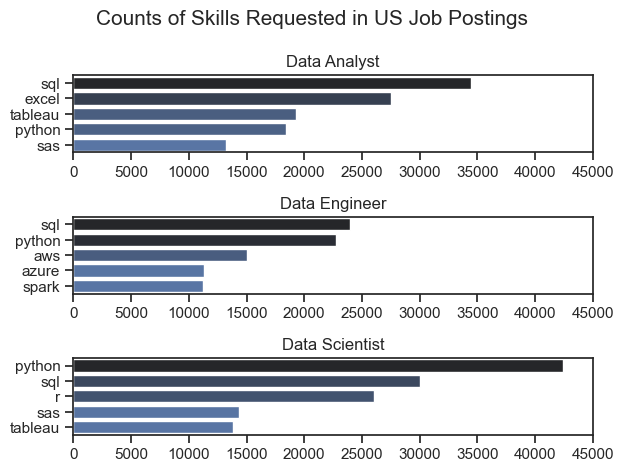

In [32]:
fig, ax = plt.subplots(len(job_titles), 1)
# clean up the plot
sns.set_theme(style='ticks')

# for loop to through the job_titles list
for i, job_title in enumerate(job_titles):
    # Get the first 5 rows of the filtered subset and order in descending
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    # Plot results
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    # set the x-axis to the same limit
    ax[i].set_xlim(0, 45000) 

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
# add a horizontal pad for sizing issues
fig.tight_layout(h_pad=1.0) 
plt.show()

In [7]:
# Get the count of job titles using the original df
df_job_title_count = df_country_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [8]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [9]:
# Left join based on the job_title_short column
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [10]:
# Calculate the percentage
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


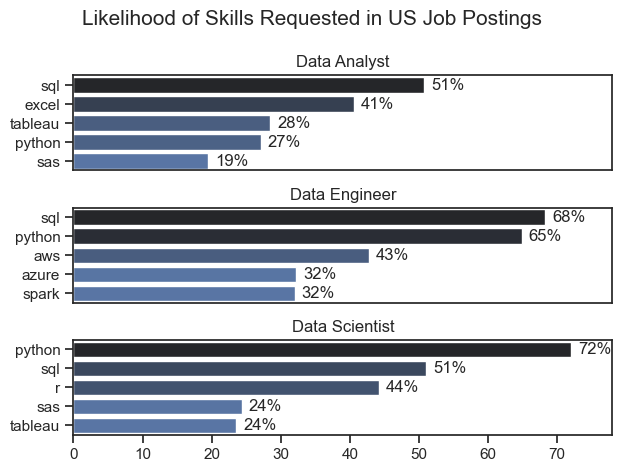

In [34]:
fig, ax = plt.subplots(len(job_titles), 1)

# Enumerate through the top 3 job titles
for i, job_title in enumerate(job_titles):
    # Get the top 5 percentages
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # Remove the x-axis ticks
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    # But the percentage value after each bar
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=1)
plt.show()